# QC Machine Learning Workshop Notebook
[Github Repository](https://github.com/ucgmsim/qc_ml_workshop_2024)  
[Support Notebook](https://github.com/ucgmsim/qc_ml_workshop_2024/blob/main/support_notebook.ipynb)

## Content
This notebook is a general introduction to machine learning. It covers the following topics:
- **Supervised Machine Learning Overview**
- **Data Preparation**
- **Model Fitting**
- **Model Evaluation & Hyperparameters**

#### Notebook Instructions
Run cells containing code by clicking on them and hitting **Shift+Enter** or by Cell>Run Cells in the drop-down menu.

#### Binder Timeout
Binder has a timeout of 10 minutes. If you are inactive for more than 10 minutes, the session will be terminated. You can restart the session by clicking on the Binder link again. Changes you made to the notebook will be lost.

### Figure Credit
All figures are from the book "Sebastian Raschka, Yuxi (Hayden) Liu, and Vahid Mirjalili. Machine Learning with PyTorch and Scikit-Learn. Packt Publishing, 2022."  
 

## Machine Learning Overview


### Types of Machine Learning
<img src="resources/imgs/ml_types.png" width="1000"/>

**Only looking at supervised ML in this workshop.**

### Typical supervised ML workflow
<img src="resources/imgs/ml_workflow.png" width="1000"/>

### Classification: Predicting a class label  

<img src="resources/imgs/ml_classification.png" width="1000">

### Regression: Predicting a continuous value  

<img src="resources/imgs/ml_regression.png" width="1000">

## Python Packages
- **Pandas**: Data manipulation, [website](https://pandas.pydata.org/), [user guide](https://pandas.pydata.org/docs/user_guide/index.html)
- **Numpy**: Numerical operations, [website](https://numpy.org/), [user guide](https://numpy.org/doc/stable/user/index.html)
- **Scikit-learn**: Machine learning models, [website](https://scikit-learn.org/stable/index.html), [user guide](https://scikit-learn.org/stable/user_guide.html)
- **Matplotlib**: Plotting, [website](https://matplotlib.org/), [user guide](https://matplotlib.org/stable/users/index)

## Resources for further learning

#### Free, Online
- [Kaggle "Courses"](https://www.kaggle.com/learn)
- [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)

#### Books
- Machine Learning with Pytorch and Scitkit-learn, Sebastian Raschka
- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, Aurélien Géron

## Problem Setup
Before starting the process of developing a ML model it is important to consider the following:
- **Problem Definition**: What are you trying to predict?
- **Problem Type**: Classification or Regression
- **Data Availability**: Do you have enough data and is it of sufficient quality?
- **Evaluation Metric**: How will you evaluate the model performance? For a list of evaluation metrics see the [Scikit-learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)

### Workshop Problem
- **Problem Definition**: Predict the weather pattern based on temperature, humidity and location type
- **Problem Type**: Classification
- **Data Availability**: Sufficient data available (see below)
- **Evaluation Metric**: Accuracy


In [ ]:
!git clone https://github.com/ucgmsim/qc_ml_workshop_2024.git`

In [ ]:
import sys
sys.path.insert(0,'/content/qc_ml_workshop_2024')

### ML Terminology
**Sample**: A single instance of data  
**Feature**: An input variable used to make a prediction  
**Label/Target**: The output variable we are trying to predict  
**Model**: The algorithm used to make predictions  
**Training**: The process of learning the model parameters from the data

In [3]:
import notebook_code as nc
df = nc.load_weather_data_pre(with_missing_values=True)
df.head()

,temperature,humidity,location_type,target
0,12.0,79.0,inland,Cloudy
1,11.0,69.0,coastal,Rainy
2,2.0,83.0,mountain,Snowy
3,29.0,77.0,mountain,Cloudy
4,34.0,55.0,inland,Cloudy


## Data Preparation

### Data Curation
- Data collection
- Data cleaning, e.g. handling of missing data

### Data Exploration
- Understanding data distributions
- Identifying relationships between features and the target variable
- Identifying anomalies and outliers
- Identifying any potential biases in the data, e.g. imbalanced dataset
- Identifying and selecting features

**Example: Credit Card Fraud Label Imbalance**  
<img src="resources/imgs/credit_card_fraud_imbalance.png">  
Figure from this [Kaggle notebook](https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets)

### Data Preprocessing
- Feature scaling
- Encoding of categorial features
- Encoding of target variable (if needed)

Additional resources:
- [Scikit-learn preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)

In [1]:
# Load data
import notebook_code as nc
df = nc.load_weather_data_pre(with_missing_values=True)

# Get size of the dataset
print(df.shape)

(1308, 4)


In [4]:
# Display the first few rows of the dataset
df.head()

,temperature,humidity,location_type,target
0,27.0,72.0,coastal,Cloudy
1,33.0,22.0,coastal,Sunny
2,0.0,89.0,mountain,Snowy
3,0.0,73.0,inland,Snowy
4,34.0,87.0,coastal,Rainy


In [5]:
# Get number of samples for each class
df.groupby("target").size()

target
Cloudy    364
Rainy     316
Snowy     264
Sunny     364
dtype: int64

### Missing Data

How to handle:
- Remove rows or features with missing data
- Impute missing data, i.e. use interpolation techniques to infer missing values from the other samples, for example using the mean or median of the feature.

Handling of missing data is dataset/problem specific!    

In [6]:
# Check for missing data
# Note: This isn't always as easy, sometimes missing data is encoded as multiple specific values, e.g. N/A, -999, NA, etc.
df.loc[df.isna().any(axis=1)].head(10)

,temperature,humidity,location_type,target
10,NaN,NaN,inland,Snowy
16,29.0,42.0,NaN,Sunny
26,NaN,70.0,inland,Cloudy
30,43.0,51.0,NaN,Sunny
31,NaN,97.0,NaN,Rainy
46,32.0,NaN,coastal,Sunny
78,NaN,96.0,coastal,Rainy
90,34.0,87.0,NaN,Rainy
91,24.0,NaN,mountain,Sunny
99,21.0,NaN,coastal,Cloudy


In [7]:
df.isna().sum(axis=0)

temperature      36
humidity         32
location_type    30
target            0
dtype: int64

In [8]:
# Drop rows with missing data
print(f"Number of samples before dropping: {len(df)}")
df = df.dropna()
print(f"Number of samples after dropping: {len(df)}")
df.isna().sum(axis=0)

Number of samples before dropping: 1308
Number of samples after dropping: 1214


temperature      0
humidity         0
location_type    0
target           0
dtype: int64

### Feature Scaling

Almost all machine learning models require features to be features to be on the same scale, this prevents the model from being biased towards features with larger scales.  
It's therefore good practice to always scale features before fitting a model.

In [9]:
import notebook_code as nc
nc.feature_scaling()

interactive(children=(FloatLogSlider(value=1.0, description='X2 Scale', max=3.0, min=-3.0, step=1.0), Output()…

Most common method is **Z-score standardisation**, which transforms the data to have zero mean and unit variance.  
The formula for Z-score standardisation is:   
$X_{std} = \frac{X - \mu} {\sigma}$

X1 - Mean: -5.662137425588298e-17, Std: 1.0050378152592123
X2 - Mean: 9.992007221626409e-17, Std: 1.005037815259212


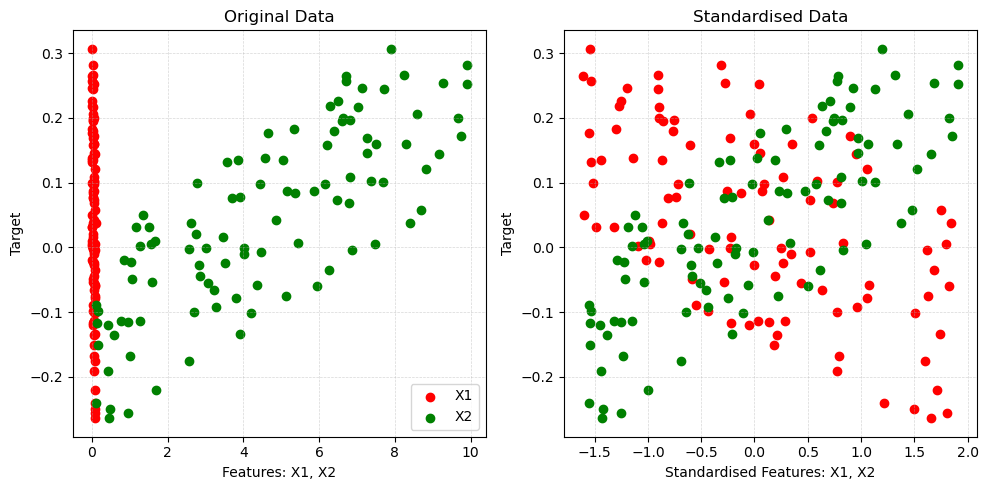

In [10]:
# Apply standardisation 
from sklearn.preprocessing import StandardScaler
import notebook_code as nc
df = nc.get_fs_data()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data (i.e. calculate the mean and standard deviation)
scaler.fit(df[["x1", "x2"]])

# Transform the data
df[["x1_std", "x2_std"]] = scaler.transform(df[["x1", "x2"]])

print(f"X1 - Mean: {df['x1_std'].mean()}, Std: {df['x1_std'].std()}")
print(f"X2 - Mean: {df['x2_std'].mean()}, Std: {df['x2_std'].std()}")

# Plot the data
nc.vis_scaling(df)

### Categorial Features/Inputs

Machine learning models require numerical inputs, so categorial features need to be encoded.  

There are two types of categorial features:

1. **Ordinal**: Features with an inherent order, e.g. small, medium, large
2. **Nominal**: Features without an inherent order, e.g. red, green, blue

In [11]:
# Example data
import notebook_code as nc
df = nc.load_cat_example()
df

,color,size,price,target
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


#### Ordinal Feature Mapping
- Map the categories to numerical values, such that the numerical values reflect the order of the categories
- Additionally, the numerical values should be close to the actual difference between the categories
- This generally means that the mapping has to be defined manually
- For example, small=0, medium=1, large=2

### Nominal Feature Encoding
- Cannot use the same approach as for ordinal features, as there is no inherent order!
- For example setting green=1, red=2, blue=3 would imply that blue is larger than green
- This is commonly addressed by using one-hot encoding, which creates a new binary feature for each category

In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Fit the encoder to the data, (i.e. determine the categories)
encoder.fit(df[["color"]])
# Get encoded feature column names
encoded_columns = encoder.get_feature_names_out(['color'])
# Transform the data
df[encoded_columns] = encoder.transform(df[["color"]])
df

,color,size,price,target,size_encoded,color_blue,color_green,color_red
0,green,M,10.1,class1,1,0.0,1.0,0.0
1,red,L,13.5,class2,2,0.0,0.0,1.0
2,blue,XL,15.3,class1,6,1.0,0.0,0.0


### Label encoding
Similarly to features, ML models also require the target variable to be numerical. This is generally done using label encoding, i.e. assigning an integer value to each class.  
 The integer value assigned to the classes have no meaning, so can just enumerate the classes in the order they appear in the data. 

In [14]:
# Load weather data
import notebook_code as nc
df = nc.load_weather_data_pre()
df.head()

,temperature,humidity,location_type,target
0,11.0,71,mountain,Cloudy
1,5.0,106,inland,Snowy
2,0.0,77,mountain,Snowy
3,27.0,71,mountain,Cloudy
4,17.0,53,coastal,Cloudy


In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the data
df["target_encoded"] = label_encoder.fit_transform(df["target"])
df

,temperature,humidity,location_type,target,target_encoded
0,11.0,71,mountain,Cloudy,0
1,5.0,106,inland,Snowy,2
2,0.0,77,mountain,Snowy,2
3,27.0,71,mountain,Cloudy,0
4,17.0,53,coastal,Cloudy,0
...,...,...,...,...,...
1399,22.0,34,coastal,Sunny,3
1400,-2.0,60,inland,Snowy,2
1401,29.0,66,inland,Sunny,3
1402,29.0,86,inland,Rainy,1


In [17]:
# Inverse transform
df["target_2"] = label_encoder.inverse_transform(df["target_encoded"])
df

,temperature,humidity,location_type,target,target_encoded,target_2
0,11.0,71,mountain,Cloudy,0,Cloudy
1,5.0,106,inland,Snowy,2,Snowy
2,0.0,77,mountain,Snowy,2,Snowy
3,27.0,71,mountain,Cloudy,0,Cloudy
4,17.0,53,coastal,Cloudy,0,Cloudy
...,...,...,...,...,...,...
1399,22.0,34,coastal,Sunny,3,Sunny
1400,-2.0,60,inland,Snowy,2,Snowy
1401,29.0,66,inland,Sunny,3,Sunny
1402,29.0,86,inland,Rainy,1,Rainy


### Hands-On Data Preprocessing

In [18]:
# Load data
import notebook_code as nc
df = nc.load_weather_data(with_missing_values=True, subset=True, features=["temperature", "humidity", "location_type"])
df.head()

,temperature,humidity,location_type,target
0,-16.0,97.0,inland,Snowy
1,18.0,77.0,inland,Rainy
2,10.0,78.0,NaN,Cloudy
3,24.0,84.0,mountain,Rainy
4,12.0,50.0,inland,Cloudy


In [19]:
### Hands-on section
# 1) Handle missing data
# 2) Standardise numerical features
# 3) Encode categorial features
# 4) Encode target variable

### Your code here



## Model Fitting
In this notebook we will focus solely on decision tree models, however there are many other model types available.

List of most common ML models according to ChatGPT:
> The most commonly used supervised machine learning models are:
> 
> 1. **Linear Regression**: Used for predicting continuous values by modeling the relationship between input features and the target variable.
> 
> 2. **Logistic Regression**: Used for binary classification tasks by estimating the probability that an instance belongs to a particular class.
> 
> 3. **Decision Trees**: A versatile model that splits data into subsets based on feature values, used for both classification and regression tasks.
> 
> 4. **Random Forest**: An ensemble of decision trees that improves performance by averaging the predictions of multiple trees to reduce overfitting.
> 
> 5. **Support Vector Machines (SVM)**: A powerful model for classification tasks that finds the optimal hyperplane to separate different classes.
> 
> 6. **k-Nearest Neighbors (k-NN)**: A simple classification model that assigns labels based on the majority class of the k-nearest neighbors in the training data.
> 
> 7. **Naive Bayes**: A probabilistic classifier based on Bayes' theorem, assuming independence between features, often used for text classification.
> 
> 8. **Gradient Boosting Machines (GBM)**: An ensemble model that builds trees sequentially, with each new tree correcting errors made by the previous ones (e.g., XGBoost, LightGBM, CatBoost).
> 
> 9. **Neural Networks**: Particularly effective for complex tasks like image recognition and natural language processing, neural networks can model intricate patterns by learning from multiple layers of abstraction.
> 
> 10. **k-Nearest Neighbors (k-NN)**: A non-parametric model used for both classification and regression, which predicts the output based on the closest training examples in the feature space.
> 
> These models are widely used due to their effectiveness across various domains and their ability to handle different types of data and tasks.

The scikit-learn library has implementation for almost all of these, see the [documentation](https://scikit-learn.org/stable/user_guide.html) for more details.

### Decision Tree  
<img src="resources/imgs/ml_decision_tree_example.png">

### Decision Tree - Manual Fitting

In [ ]:
### Task/Questions:
# - What is the best accuracy you can achieve?
# - What would allow you to create an even better model?
# - What are some of the limitations of the model?
import man_decision_tree as mdt
mdt.run_man_decision_tree()

Output()

Button(description='Run', style=ButtonStyle())

Output()

### Decision Tree - Fitting

In [4]:
# Load the pre-processed data
import notebook_code as nc
df, features, label_encoder = nc.load_weather_data(subset=True, pre_process=True, features=["temperature", "humidity", "location_type"])
df = df[features + ["target_encoded"]]
df

,humidity,temperature,location_type_coastal,location_type_inland,location_type_mountain,target_encoded
0,-1.734709,0.967258,0.0,0.0,1.0,3
1,0.558618,0.221450,0.0,0.0,1.0,1
2,-0.466060,0.565669,0.0,0.0,1.0,3
3,0.948972,-1.614385,0.0,1.0,0.0,2
4,-0.075706,-0.925947,0.0,0.0,1.0,2
...,...,...,...,...,...,...
1324,-0.807619,0.278820,0.0,0.0,1.0,3
1325,0.363441,-0.294878,1.0,0.0,0.0,1
1326,-0.319677,0.221450,0.0,0.0,1.0,0
1327,1.046560,-1.614385,0.0,0.0,1.0,2


In [5]:
# Fit a decision tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(df[features], df["target_encoded"])

# Get model predictions
y_pred = clf.predict(df[features])

# Calculate accuracy
accuracy = accuracy_score(df["target_encoded"], y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


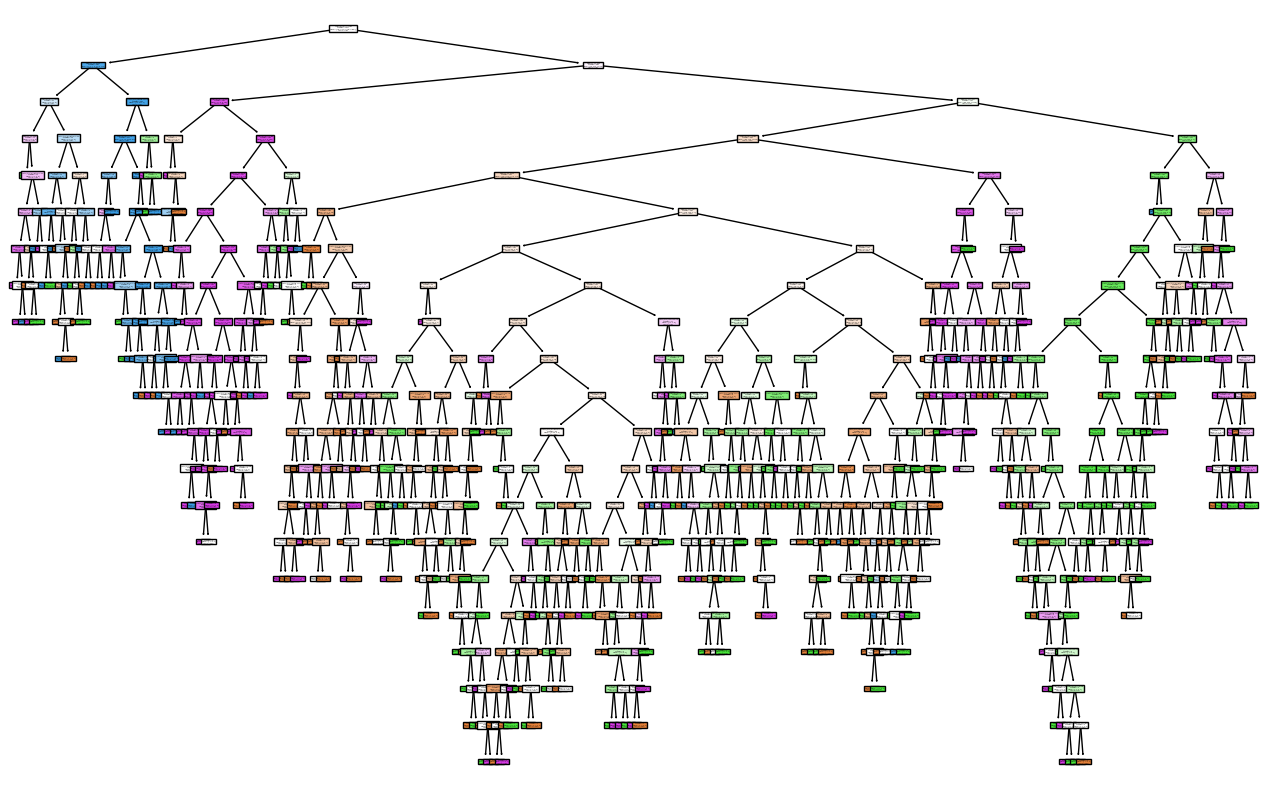

In [6]:
# Visualize the decision tree
plt.figure(figsize=(16, 10))
plot_tree(clf, filled=True, impurity=False, feature_names=features, class_names=label_encoder.inverse_transform(clf.classes_))
plt.show()

Note: Left corresponds to True, Right corresponds to False

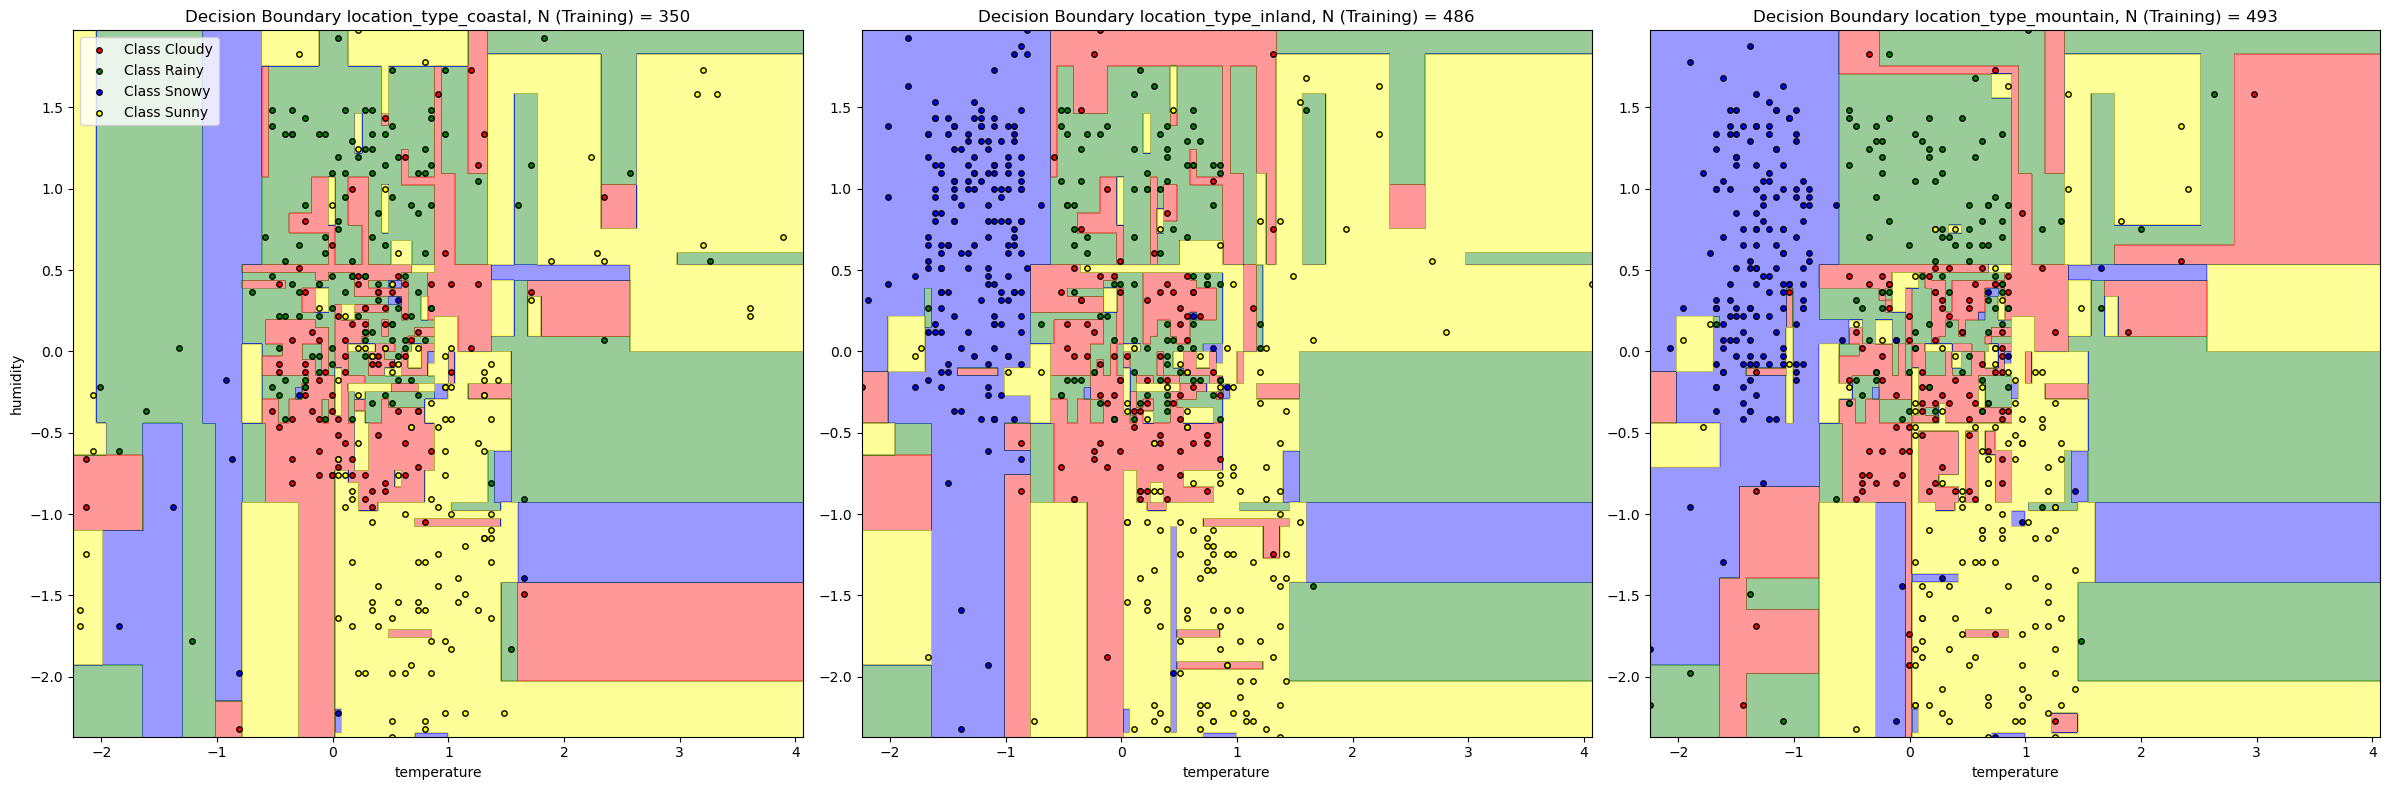

In [7]:
### Plot decision boundary
nc.plot_decision_boundaries(df, clf, features, label_encoder)

### Overfitting and Underfitting

In [8]:
import notebook_code as nc
nc.linear_regression_fitting_example()

Output()

## How to tell if a model is overfitting or underfitting? 
- Evaluate model performance on unseen data

In [9]:
import notebook_code as nc
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Data loading
features = ["temperature", "humidity", "location_type"]
df = nc.load_weather_data(subset=True, features=features)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df[features],
                                                  df["target"],
                                                  test_size=0.2,
                                                  random_state=42)
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)

print(f"Number of samples before splitting: {len(df)}")
print(f"Number of training samples: {len(train_df)}")
print(f"Number of validation samples: {len(val_df)}")

Number of samples before splitting: 1227
Number of training samples: 981
Number of validation samples: 246


In [10]:
### Pre-processing
# Standardise numerical features
numerical_features = ["temperature", "humidity"]
scaler = StandardScaler()
scaler.fit(train_df[numerical_features])
train_df[numerical_features] = scaler.transform(train_df[numerical_features])
val_df[numerical_features] = scaler.transform(val_df[numerical_features])

# Encode categorial features
nominal_features = ["location_type"]
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(train_df[nominal_features])
encoded_columns = encoder.get_feature_names_out(nominal_features)
train_df[encoded_columns] = encoder.transform(train_df[nominal_features])
val_df[encoded_columns] = encoder.transform(val_df[nominal_features])
features = numerical_features + list(encoded_columns)

# Encode target variable
label_encoder = LabelEncoder()
train_df["target_encoded"] = label_encoder.fit_transform(train_df["target"])
val_df["target_encoded"] = label_encoder.transform(val_df["target"])

Training Accuracy: 0.9857
Validation Accuracy: 0.6504


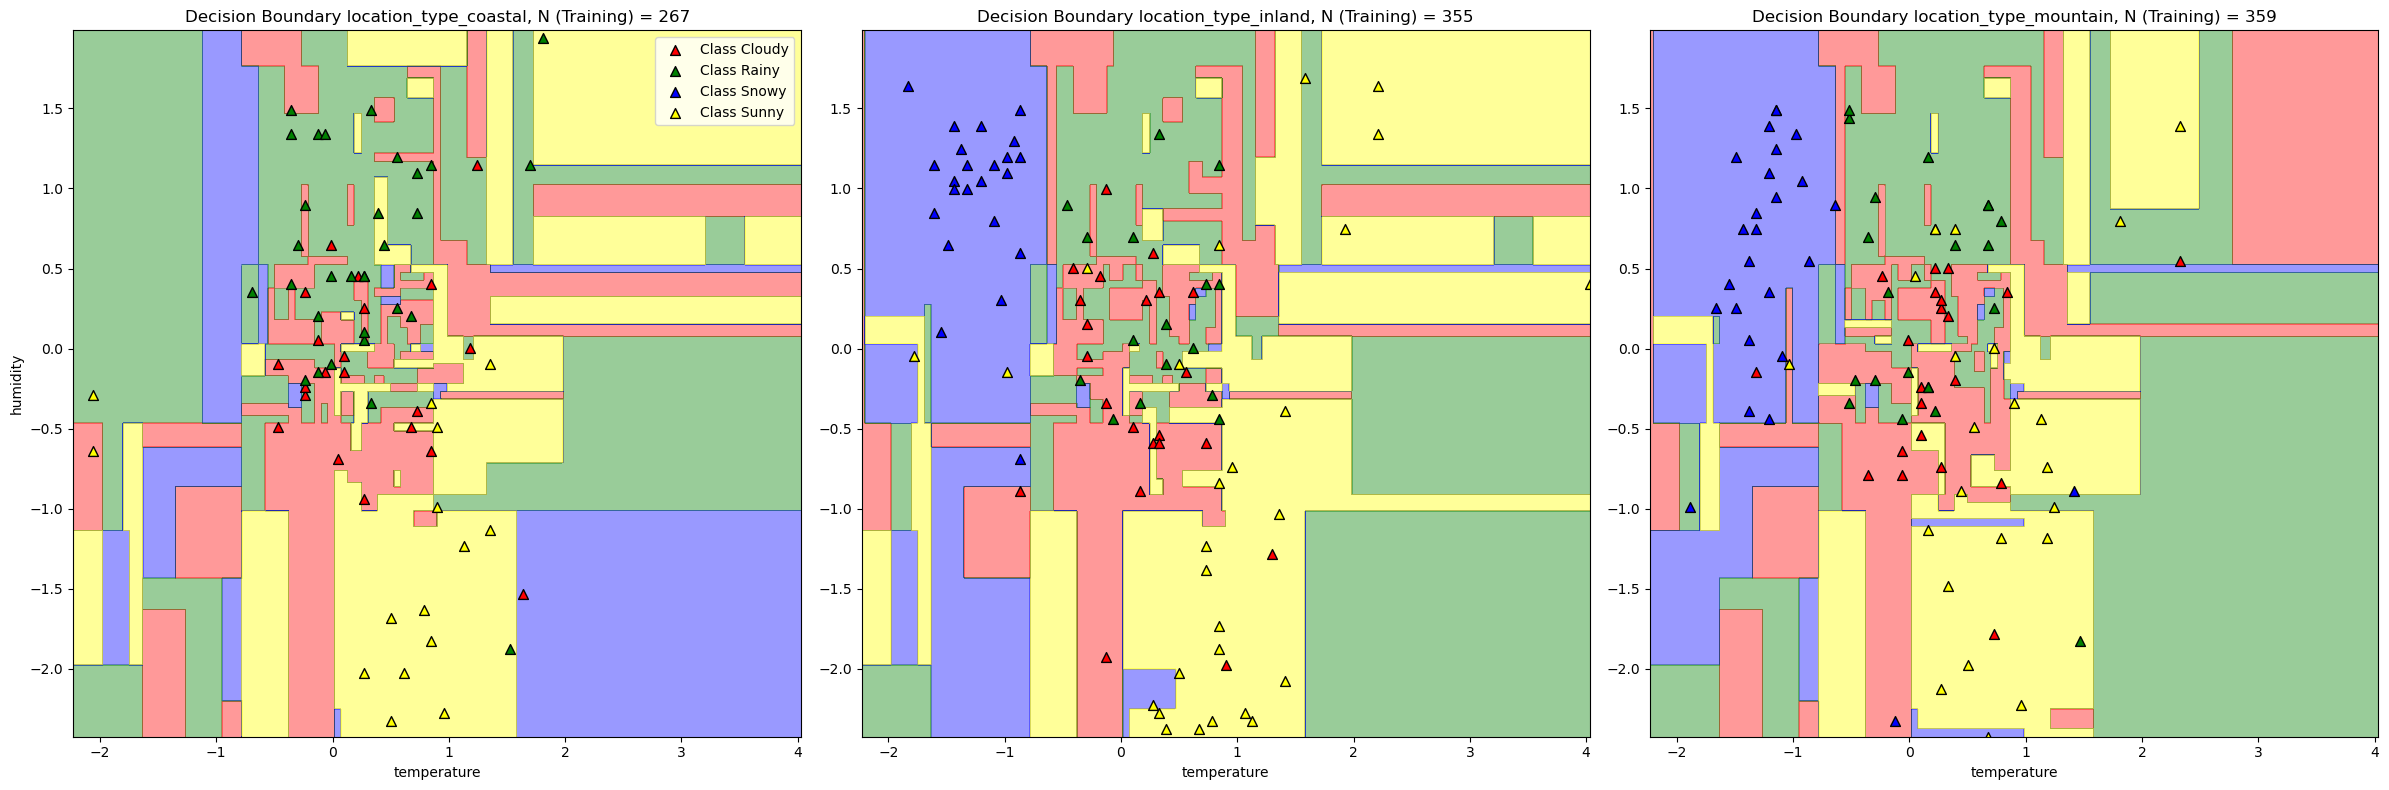

In [11]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(train_df[features], train_df["target_encoded"])

# Get model predictions
train_y_pred = clf.predict(train_df[features])
val_y_pred = clf.predict(val_df[features])

# Calculate accuracy
train_accuracy = accuracy_score(train_df["target_encoded"], train_y_pred)
val_accuracy = accuracy_score(val_df["target_encoded"], val_y_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Plot the decision boundary
nc.plot_decision_boundaries(train_df, clf, features, label_encoder, val_df=val_df, show_train=False)

### Holdout Method
- Split available (labelled) data into a training and validation set
- Generally split data 80% for training and 20% for validation
- Scikit-learn function: [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

## How To Address Underfitting/Overfitting?

- Collect more data
- Data augmentation
- Feature engineering
- Feature selection
- Increase/Reduce model complexity
- Decrease/Increase applied regularization
- Explore different model types

## Hyperparameters
Parameters that are set before the training of the model that control the learning process.  
Unlike model parameters, hyperparameters are not learned during training, instead these are set by the user.  
They have a significant impact on the model performance and can be used to address overfitting/underfitting.    
  
They are generally model specific, for example the hyperparameters for a Decision Tree model are different from those of a Neural Network model.

Examples for a Decision Tree:
- Maximum depth of the tree
- Minimum number of samples required to split a node
- Minimum number of samples required at each leaf node
- For a full list see the Decision Tree [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [12]:
### Hyperparameter Example
import notebook_code as nc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd

# Data loading
features = ["temperature", "humidity", "location_type"]
df = nc.load_weather_data(subset=True, features=features)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df[features],
                                                  df["target"],
                                                  test_size=0.2,
                                                  random_state=42)
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)

print(f"Number of samples before splitting: {len(df)}")
print(f"Number of training samples: {len(train_df)}")
print(f"Number of validation samples: {len(val_df)}")

# Run the pre-processing
train_df, val_df, features, label_encoder = nc.run_weather_preprocess(train_df, val_df)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=4)

# Train the model on the training data
clf.fit(train_df[features], train_df["target_encoded"])

# Get model predictions
train_y_pred = clf.predict(train_df[features])
val_y_pred = clf.predict(val_df[features])

# Calculate accuracy
train_accuracy = accuracy_score(train_df["target_encoded"], train_y_pred)
val_accuracy = accuracy_score(val_df["target_encoded"], val_y_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Number of samples before splitting: 1351
Number of training samples: 1080
Number of validation samples: 271
Training Accuracy: 0.7454
Validation Accuracy: 0.7048


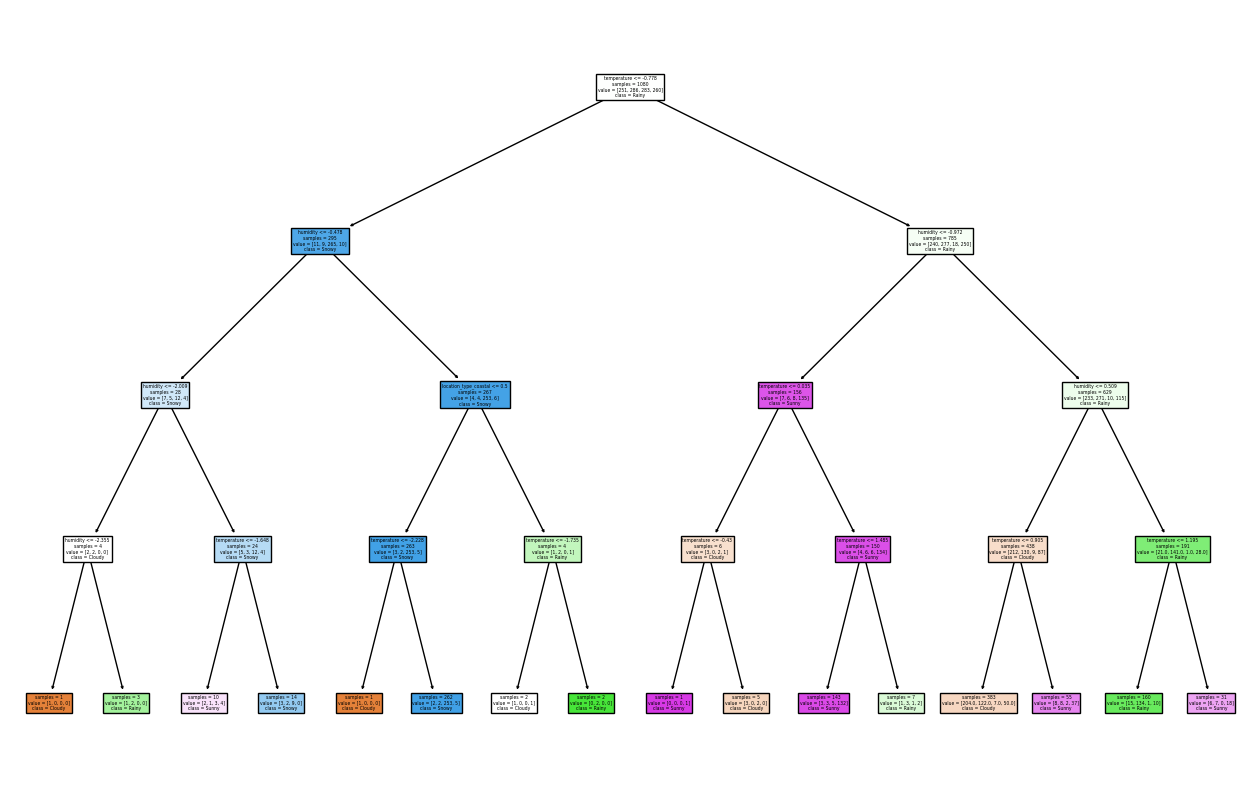

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
plot_tree(clf, filled=True, impurity=False, feature_names=features, class_names=label_encoder.inverse_transform(clf.classes_))
plt.show()

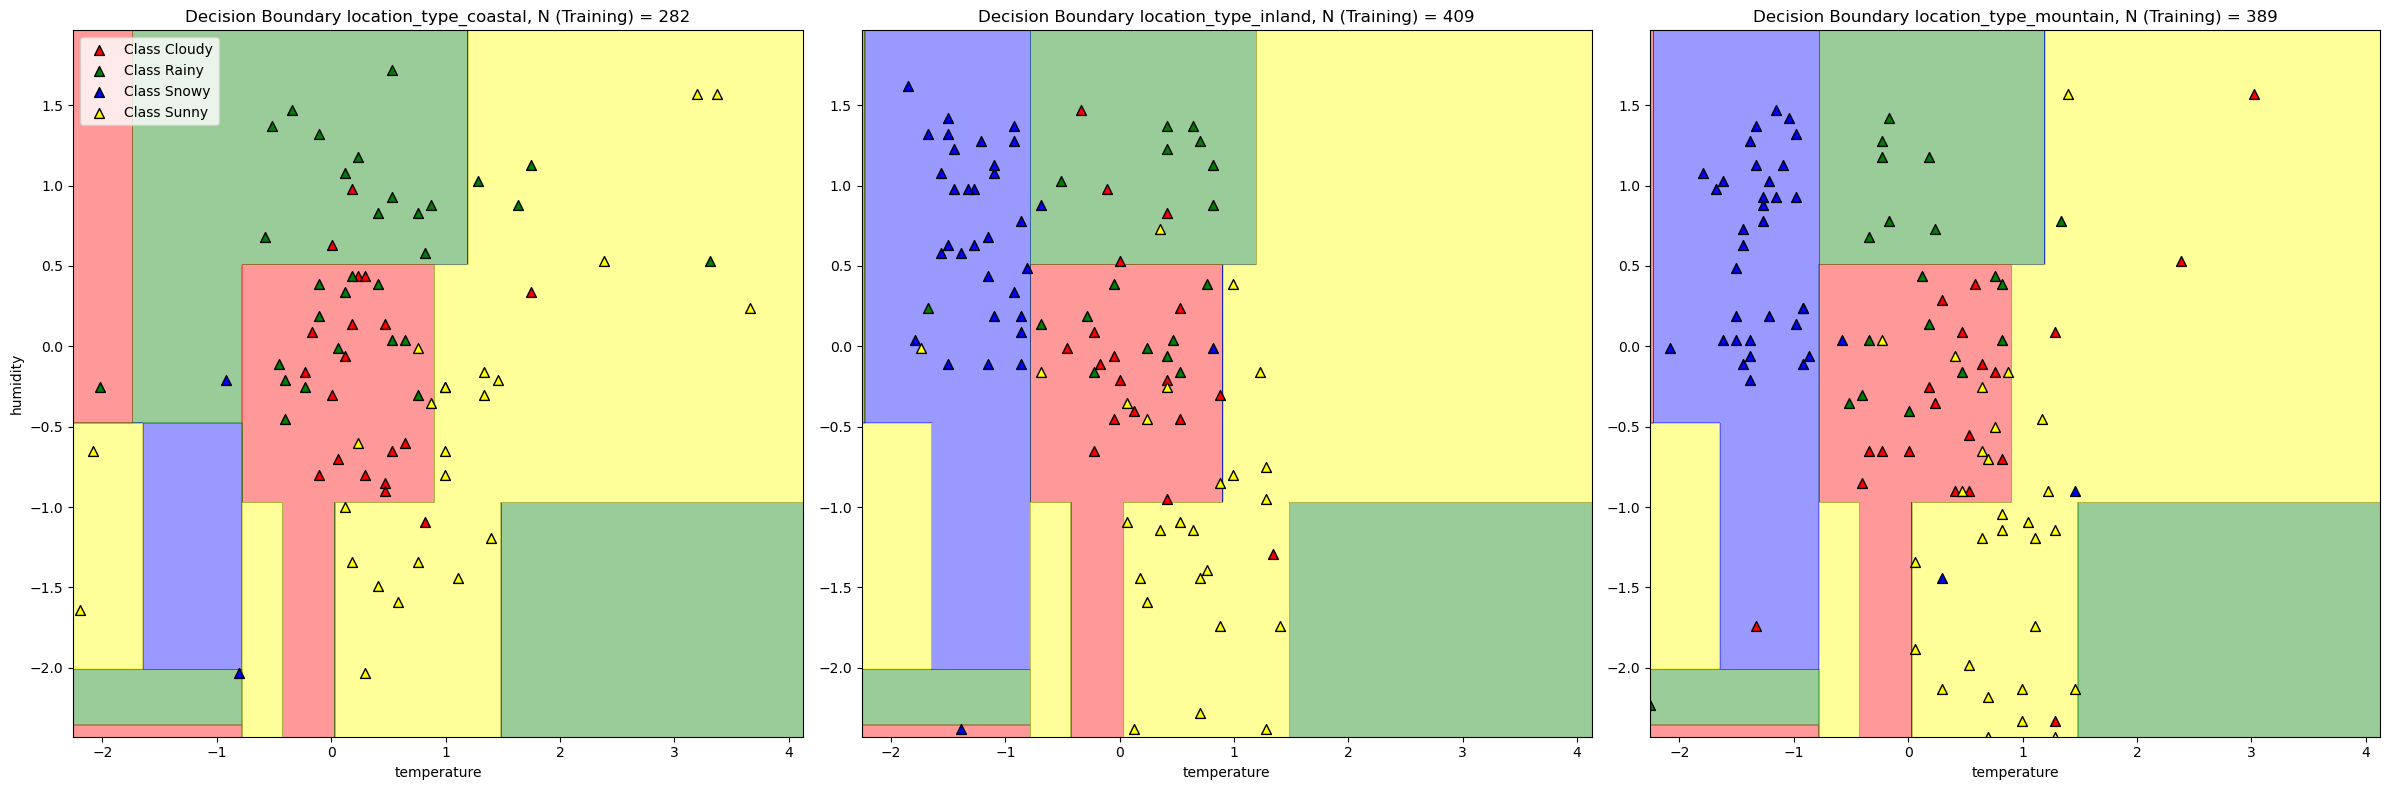

In [14]:
nc.plot_decision_boundaries(train_df, clf, features, label_encoder, val_df=val_df, show_train=False)

In [15]:
### Interactive Hyperparameter Example
### Task/Questions:
# - What do these hyperparameters do? See the documentation, https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# - How do they impact the model?
# - What are the differences and commonalities between the three hyperparameters?
# - What are some other hyperparameters that could be used?
# - What is the best hyperparameter combination?
import notebook_code as nc
nc.manual_hyperparam_tuning()

Output()

### Complete model evaluation strategy
- **Training dataset**: Used to train the model
- **Validation dataset**: Used to evaluate the model performance during hyperparameter tuning
- **Test dataset**: Used to evaluate the final model performance

<img src="resources/imgs/ml_train_val_test.png">

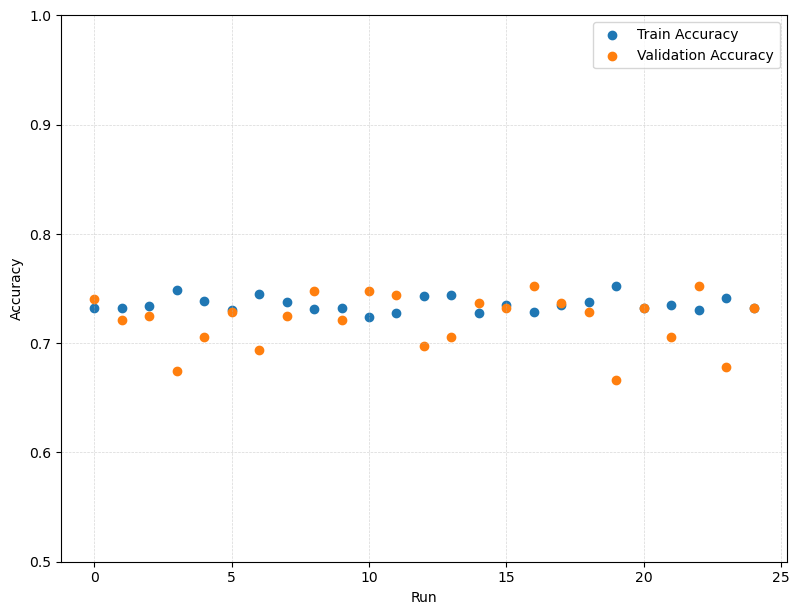

In [16]:
### Variation in holdout runs
import notebook_code as nc
nc.holdout_variations()


### K-Fold Cross Validation
- Provides a more robust estimate of the model performance
- Gives indication on uncertainty in the model performance
- Also supported by scikit-learn: [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

<img src="resources/imgs/ml_cross_val.png" width="1000"/>

In [17]:
### Cross Validation Example
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import notebook_code as nc

# Get the dataset
features = ["temperature", "humidity", "location_type"]
df, features, label_encoder = nc.load_weather_data(subset=True, features=features, pre_process=True)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Use cross-validation to evaluate the model
cv_scores = cross_val_score(clf, df[features], df["target_encoded"], cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {', '.join([f'{cur_score:.3f}' for cur_score in cv_scores])}")
print(f"Mean cross-validation score: {cv_scores.mean():.2f}")
print(f"Standard deviation of cross-validation scores: {cv_scores.std():.2f}")

Cross-validation scores: 0.633, 0.678, 0.673, 0.617, 0.673
Mean cross-validation score: 0.65
Standard deviation of cross-validation scores: 0.03


## How to select the "best" hyperparameter values?

### Hyperparameter tuning
- Basic idea: Test different hyperparameter value combinations, evaluate their performance and select the best one
- Lots of different methods available, see the [Scikit-learn User Guide](https://scikit-learn.org/stable/modules/grid_search.html) for more details

##### Grid Search
Determines the best hyperparameters by exhaustively searching through a specified parameter grid   

##### Random Search
Determines the best hyperparameters by randomly sampling from a specified parameter grid

<img src="resources/imgs/ml_hyper_tuning.png" width="1000"/>

In [18]:
### Grid Search Example
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import notebook_code as nc

features = ["temperature", "humidity", "location_type"]
df, features, label_encoder = nc.load_weather_data(subset=True, features=features, pre_process=True)

# Create the classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for the search
param_grid = {
    'max_depth': [2, 4, 8],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

# Perform the grid search using cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(df[features], df["target_encoded"])

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [19]:
# Create a dataframe with the results
results = []
for cur_param in param_grid.keys():
    results.append(pd.DataFrame(grid_search.cv_results_)[f"param_{cur_param}"])

results_df = pd.concat(results, axis=1)
results_df["mean_val_score"] = grid_search.cv_results_["mean_test_score"]
results_df["std_val_score"] = grid_search.cv_results_["std_test_score"]

In [20]:
results_df.sort_values("mean_val_score", ascending=False).head(10)

,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_val_score,std_val_score
31,4,20,20,0.721867,0.016805
30,4,10,20,0.721867,0.016805
29,4,5,20,0.721867,0.016805
28,4,2,20,0.721867,0.016805
17,4,5,1,0.718881,0.018424
16,4,2,1,0.718881,0.018424
23,4,20,5,0.717397,0.020692
19,4,20,1,0.717397,0.021869
24,4,2,10,0.717394,0.019348
20,4,2,5,0.717394,0.020193


## Roadmap

<img src="resources/imgs/ml_roadmap.png">

## Full Hands-On Example
- Apply the above concepts to a new problem
- Below are multiple options, if most of the content above was new for you then we recommend the first option.

Also feel free to any model type you like, not just Decision Trees.
For a list of supported models by scikit-learn see the [documentation](https://scikit-learn.org/stable/user_guide.html).  
The random forest model is a good choice if you want to try something new. It is an ensemble model that uses multiple decision trees to improve performance.

### Full Weather Dataset
The examples above only used a subset of the weather pattern classification dataset. See of you can apply the concepts to the full dataset and improve the model performance.  
[Dataset description](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)

In [21]:
### Loading of the full weather dataset
import notebook_code as nc
df = nc.load_weather_data()

In [22]:
df.head()

,temperature,humidity,wind_speed,precipitation_chance,cloud_cover,pressure,uv_index,season,visibility,location_type,target
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


### Concrete Compressive Strength Dataset (Regression)
[Dataset description](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength)
 

In [23]:
# Loading of the dataset
df = pd.read_csv("resources/concrete.csv")

In [24]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Heart Disease Dataset (Classification)
Predict the presence of heart disease based on various features.
[Dataset details](https://archive.ics.uci.edu/dataset/45/heart+disease)

In [25]:
# Loading of the dataset
import notebook_code as nc
df = nc.load_heart_df() 

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,Male,Typical,145.0,233.0,1.0,Left_ventricular_hypertrophy,150.0,0.0,2.3,Downsloping,0.0,Fixed_defect,Presence
1,67.0,Male,Asymptomatic,160.0,286.0,0.0,Left_ventricular_hypertrophy,108.0,1.0,1.5,Flat,3.0,Normal,No Presence
2,67.0,Male,Asymptomatic,120.0,229.0,0.0,Left_ventricular_hypertrophy,129.0,1.0,2.6,Flat,2.0,Reversable_defect,No Presence
3,37.0,Male,Non_anginal,130.0,250.0,0.0,Normal,187.0,0.0,3.5,Downsloping,0.0,Normal,Presence
4,41.0,Female,Atypical,130.0,204.0,0.0,Left_ventricular_hypertrophy,172.0,0.0,1.4,Upsloping,0.0,Normal,Presence


### New Zealand GM Prediction (Regression)
Use historical earthquakes from New Zealand to develop a ML-based GMM.

In [27]:
# Loading of the dataset
import pandas as pd
df = pd.read_csv("resources/nzgmdb.csv", dtype={"evid": str})

In [28]:
df.head(10)

,record_id,site_id,site_lat,site_lon,vs30,tsite,z1p0,z2p5,event_id,mag,...,pSA_1.25,pSA_1.5,pSA_2.0,pSA_2.5,pSA_3.0,pSA_4.0,pSA_5.0,pSA_6.0,pSA_7.5,pSA_10.0
0,1476956_MSZS,MSZS,-44.673014,167.925539,600.0,0.330,3.0,0.325,1476956,3.999576,...,0.000075,0.000049,0.000026,0.000016,0.000012,0.000008,0.000008,0.000007,0.000007,0.000007
1,1485433_MSZS,MSZS,-44.673014,167.925539,600.0,0.330,3.0,0.325,1485433,4.424900,...,0.000228,0.000162,0.000083,0.000052,0.000039,0.000023,0.000015,0.000009,0.000005,0.000004
2,1502697_MAVS,MAVS,-41.210858,175.461483,390.0,2.910,268.0,1.375,1502697,4.099265,...,0.000303,0.000211,0.000121,0.000077,0.000049,0.000028,0.000017,0.000012,0.000016,0.000014
3,1502698_MAVS,MAVS,-41.210858,175.461483,390.0,2.910,268.0,1.375,1502698,5.200000,...,0.011954,0.008150,0.004905,0.003240,0.002411,0.000984,0.000595,0.000412,0.000289,0.000252
4,1502698_MISS,MISS,-41.314888,174.818434,274.0,1.150,97.0,0.325,1502698,5.200000,...,0.004609,0.002435,0.001387,0.000775,0.000545,0.000289,0.000176,0.000123,0.000079,0.000049
5,1502698_PGMS,PGMS,-41.224506,174.879436,200.0,1.788,274.0,0.325,1502698,5.200000,...,0.008058,0.007475,0.005179,0.002657,0.001239,0.000580,0.000332,0.000219,0.000152,0.000081
6,1502698_RQGS,RQGS,-41.296528,174.781154,246.0,0.600,46.0,0.325,1502698,5.200000,...,0.006607,0.004306,0.002258,0.001446,0.000980,0.000545,0.000338,0.000231,0.000156,0.000086
7,1502698_TFSS,TFSS,-41.275427,174.783054,271.0,1.730,157.0,0.325,1502698,5.200000,...,0.008871,0.006310,0.002987,0.001768,0.001075,0.000444,0.000291,0.000196,0.000127,0.000068
8,1504146_MAVS,MAVS,-41.210858,175.461483,390.0,2.910,268.0,1.375,1504146,5.355390,...,0.001603,0.000864,0.000506,0.000422,0.000293,0.000120,0.000074,0.000050,0.000029,0.000017
9,1504146_MISS,MISS,-41.314888,174.818434,274.0,1.150,97.0,0.325,1504146,5.355390,...,0.004087,0.002187,0.000930,0.000612,0.000384,0.000200,0.000131,0.000087,0.000057,0.000044
